# 1- Basit Dogrusal Regresyon (Simple Linear Regresyon) - Alıştırmalar

## ALIŞTIRMA - 1

### Veri Setinin İncelenmesi

In [1]:
# Gerekli kütüphanelerin dahil edilmesi,
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings("ignore", category = UserWarning)

* Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/FuelConsumption.csv) indirebilirsiniz.

In [2]:
url = "https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/FuelConsumption.csv"

FuelCons = pd.read_csv(url)
df = FuelCons.copy()
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.info() # veriseti hakkında bilgi verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [4]:
df.nunique()

MODELYEAR                     1
MAKE                         39
MODEL                       663
VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64

In [5]:
df.FUELTYPE.value_counts()

X    514
Z    434
E     92
D     27
Name: FUELTYPE, dtype: int64

In [6]:
df.isnull().values.any() # verisetinde eksik veya hatalı deger var mı?

False

In [7]:
df.describe().T # verisetinin dagılımı hakkında bilgi verir.

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [8]:
df.corr() # verisetinin degiskenleri arasındaki korelasyon durumu

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


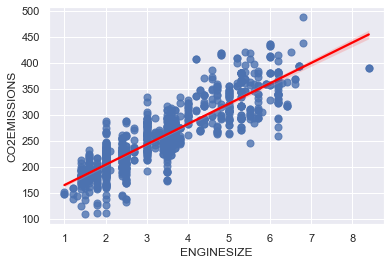

In [9]:
sns.set_theme(color_codes = True)
sns.regplot(data = df, x = 'ENGINESIZE', y = 'CO2EMISSIONS', color = 'red', scatter_kws = {'s': 50, 'color' : 'b'});

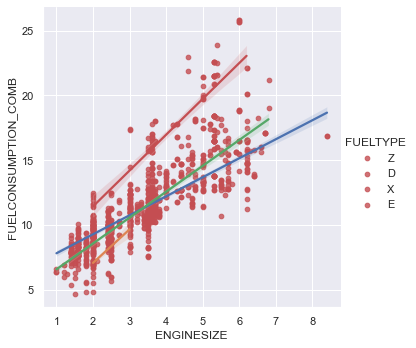

In [10]:
sns.lmplot(data = df, x = 'ENGINESIZE', y = 'FUELCONSUMPTION_COMB', hue = 'FUELTYPE', scatter_kws={'s': 22, 'color' : 'r'});

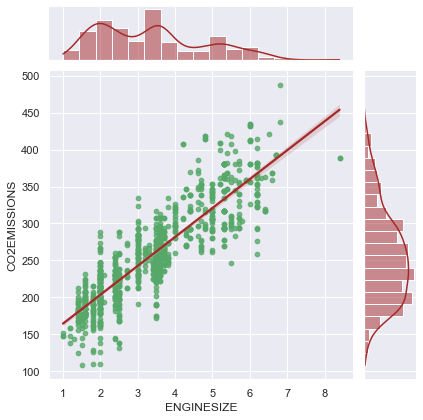

In [11]:
sns.jointplot(data = df, x = 'ENGINESIZE', y = 'CO2EMISSIONS', kind = 'reg', color = 'brown', scatter_kws = {'color': 'g', 's':22});

### StatsModels İle Modelleme

In [12]:
# 1.yol modelleme,
# bagımsız degisken: ENGINESIZE, bagımlı degisken: CO2EMISSIONS

X1 = df[["ENGINESIZE"]]
X1 = sm.add_constant(X1) # katsayı eklenmeli
y1 = df["CO2EMISSIONS"]

# model nesnesinin olusturulması ve fit edilmesi
lm1 = sm.OLS(y1, X1)
model1 = lm1.fit()

denklem1 = "Co2 Emissions = " + str(model1.params[0]) + " + enginesize * " + str(model1.params[1]) # model denklemi

# hata degerleri
mse1 = np.mean((y1 - model1.fittedvalues) ** 2) # MSE
rmse1 = np.sqrt(mse1) # RMSE
rscore1 = model1.rsquared # r-squared
pvalue1 = model1.f_pvalue # p-value

print(model1.summary())
print("***********************************************")
print("Model Denklemi: ", denklem1)
print("Modelin anlamlılıgı (p-value < 0.05 ise anlamlıdır): ", pvalue1)
print("Modelin basarı yüzdesi (r-squared): ", rscore1 * 100)
print("Modelin hata kareler ortalaması (MSE): ", mse1)
print("Modelin hata degeri (RMSE): ", rmse1)

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     3451.
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:34:50   Log-Likelihood:                -5169.9
No. Observations:                1067   AIC:                         1.034e+04
Df Residuals:                    1065   BIC:                         1.035e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.3041      2.420     51.779      0.0

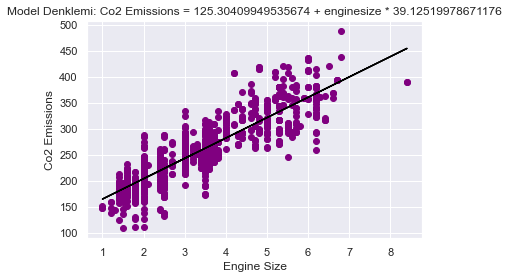

In [13]:
# Modelin görsellestirilmesi
plt.scatter(X1["ENGINESIZE"], y1, color = 'purple');
plt.plot(np.array(X1["ENGINESIZE"]), model1.predict(), color = 'black')
plt.title("Model Denklemi: " + denklem1)
plt.ylabel("Co2 Emissions")
plt.xlabel("Engine Size");

In [14]:
# 2. yol modelleme,
# bagımsız degisken: ENGINESIZE, bagımlı degisken: CO2EMISSIONS

lm2 = smf.ols(formula = 'CO2EMISSIONS ~ ENGINESIZE', data = df) 
model2 = lm2.fit()

denklem2 = "Co2 Emissions = " + str(model2.params[0]) + " + enginesize * " + str(model2.params[1]) # model denklemi

# hata degerleri
mse2 = np.mean((df['CO2EMISSIONS'] - model2.fittedvalues) ** 2) # MSE
rmse2 = np.sqrt(mse2) # RMSE
rscore2 = model2.rsquared # r-squared
pvalue2 = model2.f_pvalue # p-value

print(model2.summary())
print("***********************************************")
print("Model Denklemi: ", denklem2)
print("Modelin anlamlılıgı (p-value < 0.05 ise anlamlıdır): ", pvalue2)
print("Modelin basarı yüzdesi (r-squared): ", rscore2 * 100)
print("Modelin hata kareler ortalaması (MSE): ", mse2)
print("Modelin hata degeri (RMSE): ", rmse2)

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     3451.
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:34:50   Log-Likelihood:                -5169.9
No. Observations:                1067   AIC:                         1.034e+04
Df Residuals:                    1065   BIC:                         1.035e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    125.3041      2.420     51.779      0.0

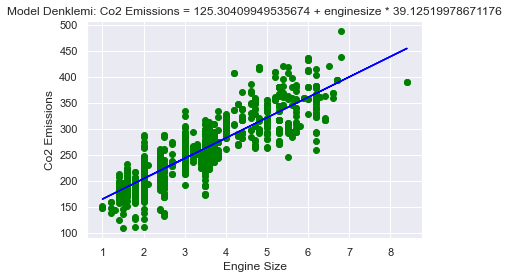

In [15]:
# Modelin görsellestirilmesi
plt.scatter(df["ENGINESIZE"], df["CO2EMISSIONS"], color = 'green');
plt.plot(np.array(X1["ENGINESIZE"]), model1.predict(), color = 'blue')
plt.title("Model Denklemi: " + denklem2)
plt.ylabel("Co2 Emissions")
plt.xlabel("Engine Size");

### ScikitLearn ile Modelleme

In [16]:
X = df[['ENGINESIZE']] # bagımsız degisken
y = df[['CO2EMISSIONS']] # bagımlı degisken

# nesne olusturulması ve fit edilmesi
lm = LinearRegression()
model = lm.fit(X, y)

denklem = "Co2emissions = {0} + enginesize * {1}".format(model.intercept_[0], model.coef_[0][0])

# hata degerleri
ypred = model.predict(X) # bagımsız degisken uzerinden tahmin edilen y degerleri
mse = mean_squared_error(y, ypred) # MSE
rmse = np.sqrt(mse) # RMSE
rscore = r2_score(y, ypred) # modelin anlamlılıgı

print("Model Denklemi: ", denklem)
print("Modelin basarı yüzdesi (r-squared): ", rscore * 100)
print("Modelin hata kareler ortalaması (MSE): ", mse)
print("Modelin hata degeri (RMSE): ", rmse)

Model Denklemi:  Co2emissions = 125.30409949535692 + enginesize * 39.12519978671172
Modelin basarı yüzdesi (r-squared):  76.41458597854816
Modelin hata kareler ortalaması (MSE):  946.314052718875
Modelin hata degeri (RMSE):  30.762217942126263


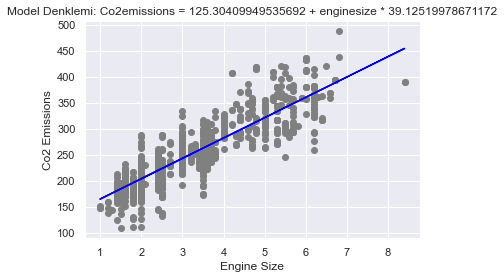

In [17]:
# Modelin görsellestirilmesi
plt.scatter(X, y, color = 'gray');
plt.plot(np.array(X), ypred, color = 'blue')
plt.title("Model Denklemi: " + denklem)
plt.ylabel("Co2 Emissions")
plt.xlabel("Engine Size");

#### Egitim ve test seti olusturularak modelleme

In [18]:
X = df[['ENGINESIZE']]
y = df[['CO2EMISSIONS']]

# %80 egitim seti, %20 test seti
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.20,
                                                   random_state = 42)

# nesne olusturulması ve fit edilmesi
lm = LinearRegression()
model = lm.fit(X_train, y_train)

# hata degerleri
ypred = model.predict(X_test)
mse = mean_squared_error(y_test, ypred)
rmse = np.sqrt(mse)
rscore = model.score(X_train, y_train)

print("Modelin basarı yüzdesi (r-squared): ", rscore * 100)
print("Modelin hata kareler ortalaması (MSE): ", mse)
print("Modelin hata degeri (RMSE): ", rmse)

Modelin basarı yüzdesi (r-squared):  76.4404200181055
Modelin hata kareler ortalaması (MSE):  985.9381692274999
Modelin hata degeri (RMSE):  31.399652374309813


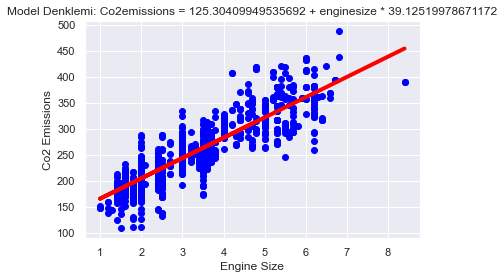

In [19]:
# modelin görsellestirilmesi
plt.scatter(X, y, color = 'blue');
plt.plot(np.array(X_test), ypred, color = 'red', linewidth = 4)
plt.title("Model Denklemi: " + denklem)
plt.ylabel("Co2 Emissions")
plt.xlabel("Engine Size");

In [20]:
# Örnek tahminler,
# Enginesize degeri 4 olurusa Co2 tahmini degeri ne olur?
# Farklı arac modellerinde enginesize degerleri 3.2, 2.5, 6 gibi degerler olursa tahmini Co2 degeri ne olur?

In [21]:
y.head(10) # gercek y degerleri

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244
5,230
6,232
7,255
8,267
9,212


In [22]:
model.predict([[4]])

array([[282.26161707]])

In [23]:
model.predict([[3.2], [2.5], [6]])

array([[251.06723409],
       [223.77214899],
       [360.24757452]])

#### Model Tuning / Model Dogrulama 

In [24]:
# cross validation
rscore_cv = cross_val_score(model, X_test, y_test, cv = 10, scoring = "r2").mean()
rmse_cv = np.sqrt(-cross_val_score(model, X_test, y_test, cv = 10, scoring = "neg_mean_squared_error")).mean()

print("Valide edilmis modelin basarı yüzdesi: ", rscore_cv * 100)
print("Valide edilmis modelin hata degeri: ", rmse_cv)

Valide edilmis modelin basarı yüzdesi:  73.88375991355949
Valide edilmis modelin hata degeri:  31.192232042002352


### Sonuç

* Statsmodels ile elde edilne degerler;
    * Model Denklemi:  Co2 Emissions = 125.30409949535674 + enginesize * 39.12519978671176
    * Modelin anlamlılıgı (p-value < 0.05 ise anlamlıdır):  0.0
    * Modelin basarı yüzdesi (r-squared):  **76.41458597854816**
    * Modelin hata kareler ortalaması (MSE):  946.314052718875
    * Modelin hata degeri (RMSE):  **30.762217942126263**
* Scikitlearn ile elde edilen degerler;
    * Model Denklemi:  Co2emissions = 125.30409949535692 + enginesize * 39.12519978671172
    * Modelin basarı yüzdesi (r-squared):  **76.41458597854816**
    * Modelin hata kareler ortalaması (MSE):  946.314052718875
    * Modelin hata degeri (RMSE):  **30.762217942126263**
* Egitim ve test seti üzerinden modelleme degerleri;
    * Modelin basarı yüzdesi (r-squared):  **76.4404200181055**
    * Modelin hata kareler ortalaması (MSE):  985.9381692274999
    * Modelin hata degeri (RMSE):  **31.399652374309813**
    * Valide edilmis degerler, 
        * Valide edilmis modelin basarı yüzdesi:  **73.88375991355949**
        * Valide edilmis modelin hata degeri:  **31.192232042002352**